In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

## Data Cleaning

### Checking the missing value

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].median())

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.shape

(542, 13)

In [10]:
df['Gender']= df['Gender'].map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [11]:
df['Married']= df['Married'].map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [12]:
df['Dependents']= df['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [13]:
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [14]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [15]:
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [16]:
df['Loan_Status']= df['Loan_Status'].map({'Y':1,'N':0})
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [18]:
import seaborn as sns

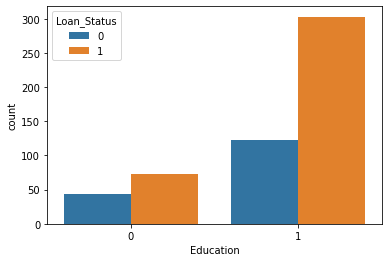

In [19]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

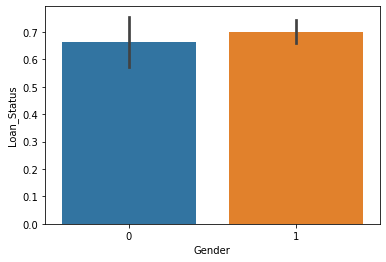

In [20]:
sns.barplot(x='Gender',y='Loan_Status',data=df)

In [21]:
x = df.iloc[:,1:12].values
y = df.iloc[:,12].values

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
model = LogisticRegression()
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
dm=pd.read_csv('test.csv')
dm

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [25]:
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [26]:
dm.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [27]:
dm['LoanAmount']= dm['LoanAmount'].fillna(dm['LoanAmount'].mean())
dm['LoanAmount']= dm['LoanAmount'].fillna(dm['LoanAmount'].median())

In [28]:
dm.dropna(inplace=True)
dm.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [29]:
dm['Gender']= dm['Gender'].map({'Male':1,'Female':0})
dm['Gender'].value_counts()

1    233
0     60
Name: Gender, dtype: int64

In [30]:
dm['Married']= dm['Married'].map({'Yes':1,'No':0})
dm['Married'].value_counts()

1    191
0    102
Name: Married, dtype: int64

In [31]:
dm['Dependents']= dm['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})
dm['Dependents'].value_counts()

0    169
2     50
1     44
3     30
Name: Dependents, dtype: int64

In [32]:
dm['Education']=dm['Education'].map({'Graduate':1,'Not Graduate':0})
dm['Education'].value_counts()

1    227
0     66
Name: Education, dtype: int64

In [33]:
dm['Self_Employed']=dm['Self_Employed'].map({'Yes':1,'No':0})
dm['Self_Employed'].value_counts()

0    261
1     32
Name: Self_Employed, dtype: int64

In [34]:
dm['Property_Area']=dm['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})
dm['Property_Area'].value_counts()

2    114
0     90
1     89
Name: Property_Area, dtype: int64

In [35]:
dm.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2
5,LP001054,1,1,0,0,1,2165,3422,152.0,360.0,1.0,2


In [51]:
dm.index

Int64Index([  0,   1,   2,   4,   5,   6,   7,   9,  10,  14,
            ...
            354, 355, 356, 357, 359, 361, 362, 363, 365, 366],
           dtype='int64', length=293)

In [36]:
a=dm['Loan_ID']

In [41]:
test=dm.drop(columns=['Loan_ID'],axis=1)
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2
5,1,1,0,0,1,2165,3422,152.0,360.0,1.0,2


In [37]:
from sklearn.metrics import accuracy_score

In [38]:
train_pred=model.predict(x)
training_data_accuracy=accuracy_score(train_pred,y)

In [39]:
print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.8062730627306273


In [42]:
test_pred=model.predict(test)

In [43]:
test_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [44]:
a

0      LP001015
1      LP001022
2      LP001031
4      LP001051
5      LP001054
         ...   
361    LP002969
362    LP002971
363    LP002975
365    LP002986
366    LP002989
Name: Loan_ID, Length: 293, dtype: object

In [52]:
df2 = pd.DataFrame()
df2['Loan_ID'] = a
df2.Loan_ID.dropna(inplace=True)
df2['Loan_Status'] = test_pred
df2['Loan_Status'].map({1:'Y',0:'N'})

0      Y
1      Y
2      Y
4      Y
5      Y
      ..
361    Y
362    Y
363    Y
365    Y
366    Y
Name: Loan_Status, Length: 293, dtype: object

In [ ]:
df2.to_csv('submission.csv')